Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\anuhe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\anuhe\AppData\Local\Temp\ipykernel_25608\3303549544.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", 4)


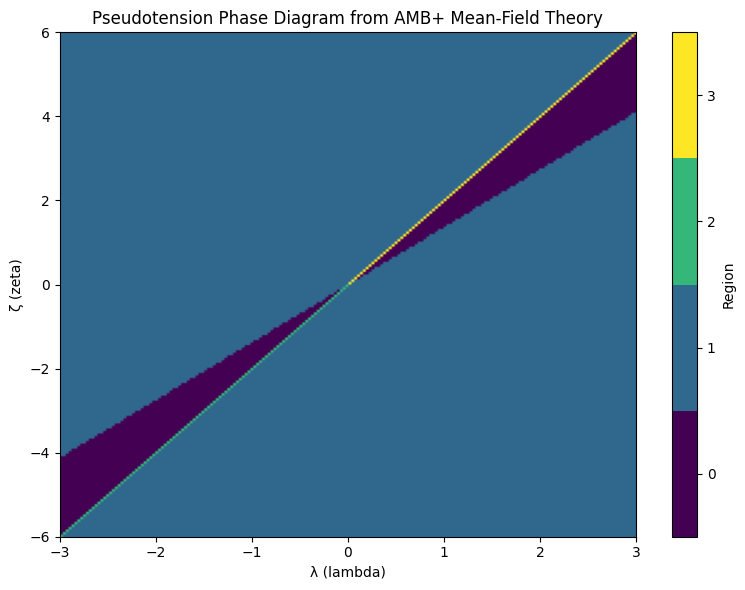

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# --- Simulation constants ---
K = 1.0  # stiffness
w = 1.0  # interfacial width

# --- Interface profile: tanh approximation ---
r = np.linspace(-6 * w, 6 * w, 1000)
phi = np.tanh(r / w)
dphi = (1 / w) * (1 - np.tanh(r / w)**2)
# --- Compute integrals S0 and S1 (see Eq. 20 in paper) ---
S0 = simpson(dphi**2, r)
S1 = simpson(dphi**4, r)


# --- Define λ and ζ scan ranges ---
lambdas = np.linspace(-3, 3, 200)
zetas = np.linspace(-6, 6, 200)
L, Z = np.meshgrid(lambdas, zetas, indexing="ij")

# --- Compute σ_droplet and σ_bubble ---
def sigma(lam, zeta):
    denom = zeta - 2 * lam
    with np.errstate(divide='ignore', invalid='ignore'):
        return (K / denom) * (zeta * S0 - 2 * lam * S1)

σ_d = sigma(L, Z)
σ_b = sigma(-L, -Z)  # bubble = droplet with flipped φ, λ, ζ

# --- Classify regions ---
regions = np.zeros_like(σ_d)
regions[np.logical_and(σ_d > 0, σ_b > 0)] = 1  # Region A
regions[np.logical_and(σ_d < 0, σ_b > 0)] = 2  # Region B
regions[np.logical_and(σ_d > 0, σ_b < 0)] = 3  # Region C
regions[np.logical_or(np.isnan(σ_d), np.isnan(σ_b))] = 0  # undefined

# --- Plotting ---
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap("viridis", 4)
plt.imshow(regions.T, origin="lower", extent=(lambdas[0], lambdas[-1], zetas[0], zetas[-1]),
           aspect='auto', cmap=cmap)
plt.colorbar(ticks=[0,1,2,3], label="Region")
plt.clim(-0.5, 3.5)
plt.xlabel("λ (lambda)")
plt.ylabel("ζ (zeta)")
plt.title("Pseudotension Phase Diagram from AMB+ Mean-Field Theory")
plt.tight_layout()
plt.grid(False)
plt.show()
